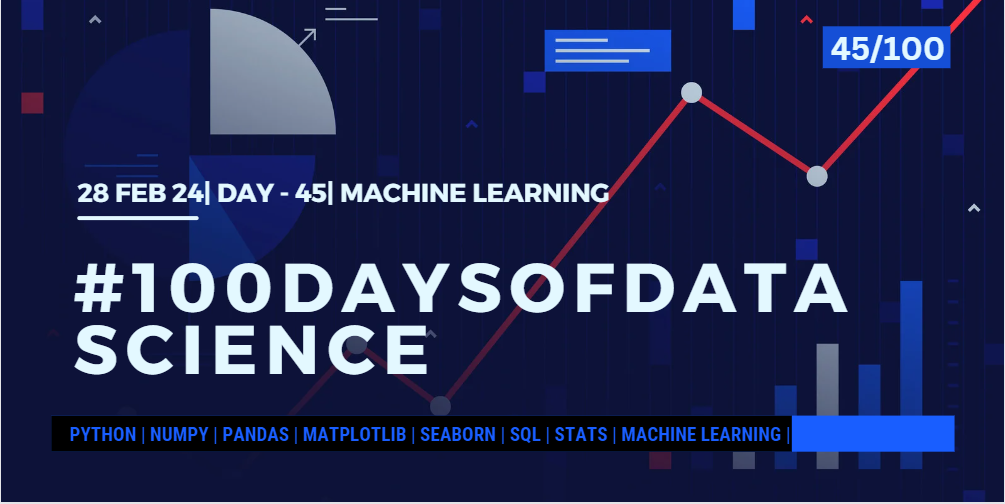

# <center>Logistic Regression<center><hr style="border:4.5px solid #108999"> </hr>
 
    

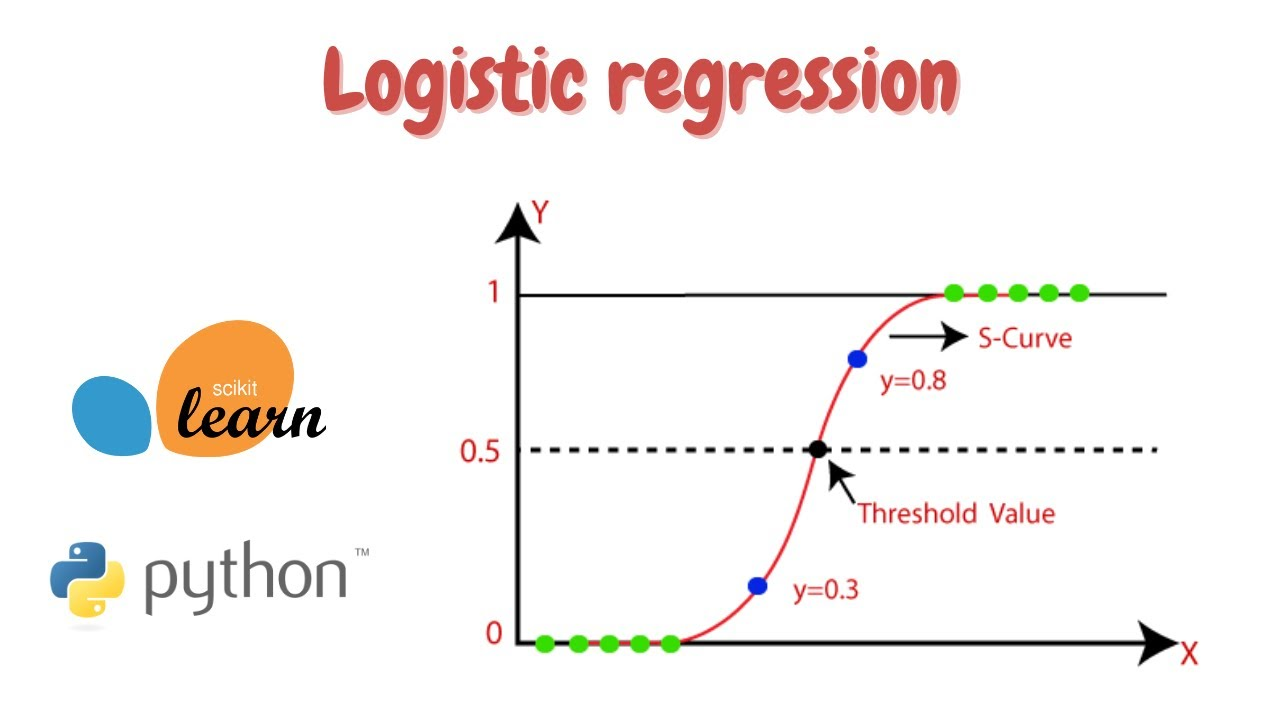

* Logistic regression is a supervised machine learning algorithm in which we have labelled data x and y are given mostly it is used for classification problem that to binary classification.
* Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. 
* Logistic Regression is also called Logit Regression. It is based on probability metric.
* It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.
* Logistic regression allows us to implement regression to find out or to measure the relationship between the independent and dependent variable. 
* It determines the probability of observations to belong to either of the two classes internally it used sigmoid function where we substitute the regression equation and reach to logit function(logistics regression equation) by taking the the log of outs ratio the algorithm gives regression equation which predicts the value of an observation to belong to class 0 and class 1. <br>

<br>
- <b>Sigmoid</b><br>This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1. The sigmoid function has an S shaped curve. It is also called sigmoid curve.<br><br>
- <b>Outs ratio</b><br> Probability of success upon probability of failure<br><br>
- <b>Logit regression equation</b><br> log(p/1-p) = β0 + β1x1<br><br>
- <b>Decision boundary</b><br> This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

* p ≥ 0.5 => class = 1
* p < 0.5 => class = 0

<b>Types of Logistic Regression </b>

Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

1. Binary Logistic Regression:
    * In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. Multinomial Logistic Regression:
    * In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

3. Ordinal Logistic Regression:
    * In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.


In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier

In [2]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 45\User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape ### Checking Shape

(400, 5)

In [4]:
df.describe() ### Get information of the Dataset

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.columns ### Checking Columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.isnull().sum() ### Checking Null Values in the Data

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df1 = pd.DataFrame.copy(df)
df1.shape

(400, 5)

In [9]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'User ID': array([15624510, 15810944, 15668575, 15603246, 15804002, 15728773,
       15598044, 15694829, 15600575, 15727311, 15570769, 15606274,
       15746139, 15704987, 15628972, 15697686, 15733883, 15617482,
       15704583, 15621083, 15649487, 15736760, 15714658, 15599081,
       15705113, 15631159, 15792818, 15633531, 15744529, 15669656,
       15581198, 15729054, 15573452, 15776733, 15724858, 15713144,
       15690188, 15689425, 15671766, 15782806, 15764419, 15591915,
       15772798, 15792008, 15715541, 15639277, 15798850, 15776348,
       15727696, 15793813, 15694395, 15764195, 15744919, 15671655,
       15654901, 15649136, 15775562, 15807481, 15642885, 15789109,
       15814004, 15673619, 15595135, 15583681, 15605000, 15718071,
       15679760, 15654574, 15577178, 15595324, 15756932, 15726358,
       15595228, 15782530, 15592877, 15651983, 15746737, 15774179,
       15667265, 15655123, 15595917, 15668385, 15709476, 15711218,
       15798659, 15663939, 15694946, 15631912, 157

In [10]:
### Finding categorical variables

colname = [var for var in df.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(colname)))
print('The categorical variables are :', colname)

There are 1 categorical variables

The categorical variables are : ['Gender']


In [11]:
### Converting all categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname:
    df1[x]=le.fit_transform(df1[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature",x)
    print("Mapping", le_name_mapping)

Feature Gender
Mapping {'Female': 0, 'Male': 1}


In [12]:
df2 = df1.copy()
df2.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [13]:
### Spliting Data into X and y
X = df2.iloc[:,1:4]
y = df2.iloc[:,-1]
print('X:',X.shape)
print('*' * 17)
print('y:',y.shape)

X: (400, 3)
*****************
y: (400,)


In [14]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#x = scaler.fit_transform(x)
print(X)

[[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.98019606  1.17910958 -1.46068138]
 [ 1.02020406 -0.15807423 -1.07893824]
 [-0.98019606  1.08359645 -0.99084367]]


In [15]:
y = y.astype(int) #convert y in to integer always perform this operation

In [16]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (320, 3)
X_test:  (80, 3)
y_train:  (320,)
y_test:  (80,)


In [17]:
#create a model object
lr = LogisticRegression()
#train the model object
lr.fit(X_train,y_train)
#predict using the model
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0]


In [18]:
lr.score(X_train,y_train)

0.846875

In [19]:
print(list(zip(df2[:-1],lr.coef_.ravel())))
print(lr.intercept_)

[('User ID', 0.2005590457098062), ('Gender', 2.1832648113729274), ('Age', 1.0595280271232759)]
[-1.01288431]


In [20]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})


,0,1
0,48,4
1,4,24


In [21]:
print('\nTrue Positives(TP) = ', cfm[0,0])
print('\nTrue Negatives(TN) = ', cfm[1,1])
print('\nFalse Positives(FP) = ', cfm[0,1])
print('\nFalse Negatives(FN) = ', cfm[1,0])


True Positives(TP) =  48

True Negatives(TN) =  24

False Positives(FP) =  4

False Negatives(FN) =  4


<Axes: >

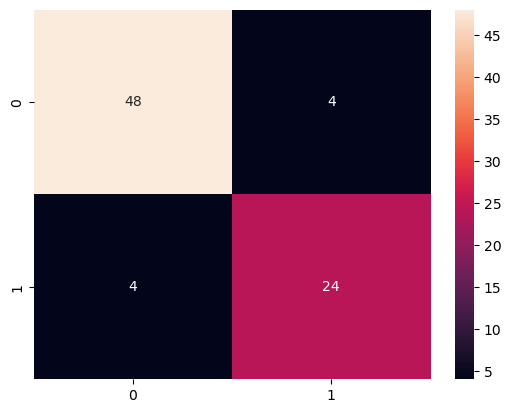

In [22]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cfm), annot=True)

In [23]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.86      0.86      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80

Accuracy of the model:  0.9
